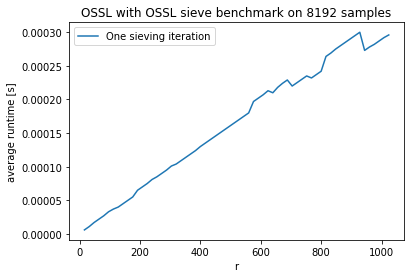

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d

stock_files = sorted(glob("../data/openssl_benchmark/debug/1strun_r*.csv"))
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)

stock_files_iter = sorted(glob("../data/openssl_benchmark/debug/1strun_iter*.csv"))
df_iter = pd.concat((pd.read_csv(file) for file in stock_files_iter), ignore_index = True)

stock_files_2 = sorted(glob("../data/openssl_benchmark/openssl_sieve/2ndrun_r*.csv"))
df2 = pd.concat((pd.read_csv(file) for file in stock_files_2), ignore_index = True)

#create vec with truth vars if some condition met
l_small = df2['r'] <= 1024
df2 = df2[l_small]

df.columns = df.columns.str.strip()
df2.columns = df2.columns.str.strip()
df_iter.columns = df2.columns.str.strip()

r = df.r
l = df.l
avgruntime = df.avgruntime

r2 = df2.r
l2 = df2.l
avgruntime2 = df2.avgruntime

r_iter = df_iter.r
l_iter = df_iter.l
avgruntime_iter = df_iter.avgruntime

# 2d preprocessing
order = np.argsort(r)
rx = np.array(r)[order]
ay = np.array(avgruntime)[order]

order = np.argsort(r_iter)
rx2 = np.array(r2)[order]
ay2 = np.array(avgruntime2)[order]

order = np.argsort(r_iter)
rx_iter = np.array(r_iter)[order]
ay_iter = np.array(avgruntime_iter)[order]

#2d
plt.title("OSSL with OSSL sieve benchmark on 8192 samples")
plt.xlabel('r')
plt.ylabel('average runtime [s]')
#plt.plot(rx, ay, label="Primitive")
#plt.plot(rx2, ay2, label="Custom")
plt.plot(rx_iter, ay_iter, label="One sieving iteration")
plt.legend()
#plt.text(50,0.01, "Number of iterations usually: 5-300, but I've seen >500", bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.savefig("../plots/ossl_debug_run_iter.jpg")

#3d
#fig = df.plot.scatter(x=0, y=1, c=2, colormap="viridis", sharex=False)
#fig.set_title("Nat with NSS sieve benchmark on 8192 samples")
#fig.figure.savefig("../plots/2nd_nat_nss_zoom.jpg")